# Contents
1. [Introduction](#intro)
2. [Retreiving the Data](#retreiving-data)<br>
    2.1. [Loading the Libraries](#load-libraries)<br>
    2.2. [Loading the datasets](#load-datasets)
3. [Taking a glimpse of the data](#data-glimpse)<br>
    3.1. [General overview of tables](#gen-overview)<br>
    3.2. [Statistical overview of the data](#stat-overview)
4. [Data cleaning and preparation](#data-prep)<br>
    4.1. [Handling Missing Data](#missing-data)
5. [Data Exploration and Visualization](#data-exploration)<br>
    5.1. [Loan counts per sector](#per-sector)<br>
    5.2. [Loan counts per world region](#per-region)<br>
    5.3. [World Region MPIs](#region-mpis)<br>
    5.4. [Repayment Intervals](#repayment)<br>

# 1. Introduction
<a id="intro" name="intro"></a>
Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world.The kiva datasets contain data on money funded to borrowers from different countries.<br>
My main objective is to pair the Kiva's datasets and do some analysis to help them understand their borrowers and improve their efficiency

# 2. Retreiving the Data
<a id="retreiving-data"></a>

### 2.1. Loading the Libraries
<a id="load-libtraries"></a>

In [1]:
# import the desired libraries

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Set default seaborn settings
sns.set()

### 2.2. Loading in the datasets
<a id="load-datasets"></a>

In [2]:
# Loading the main dataset
kiva_loans = pd.read_csv('../data/kiva/kiva_loans.csv')

# Kiva mpi region locations
mpi_region_locations = pd.read_csv('../data/kiva/kiva_mpi_region_locations.csv')

# Loan theme ids
loan_theme_ids = pd.read_csv('../data/kiva/loan_theme_ids.csv')

# Loan themes by region
loan_themes_region = pd.read_csv('../data/kiva/loan_themes_by_region.csv')

# 3. Taking a glimpse of the data
<a id="data-glimpse"></a>

### 3.1. General overview of tables
<a id="gen-overview"></a>

In [3]:
# kiva loans overview
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
# mpi regions overview
mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
# Loan theme by ids overview
loan_theme_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
# Loan themes by region
loan_themes_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


### 3.2. Statistical overview
<a id="stat-overview"></a>

#### Simple overview of all numerical values for the main dataset

In [7]:
kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


#### Simple overview of categorical(object) values(non-numerical)

In [8]:
kiva_loans.describe(include=["O"])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


# 4. Data cleaning and preparation
<a id="data-prep"></a>

### 4.1. Handling Missing Data
<a id="missing-data"></a>

Taking a look at the total counts of all missing data in our main datasets

In [9]:
# General method to check for missing values and their percentages of the total values
def check_missing_data(dataset):
    """
    Method to check for total missing values in a dataset
    
    @params: dataset: the dataset(DataFrame) to be checked
    
    returns: A DataFrame with sums of missing values and their percentage to the total missing values
    
    """
    # Extract total null values
    null_values = dataset.isnull().sum()

    # sort them
    total = null_values.sort_values(ascending=False)

    # percentage of missing values sum to total null values
    percentage = null_values / (dataset.isnull().count().sort_values(ascending=False))

    # merge the total and percentage into one dataframe
    missing_data = pd.concat([total, percentage], axis='columns', keys=['Total', 'Percentage'], sort=False)

    return missing_data

#### Missing data in kiva_loans data

In [10]:
check_missing_data(kiva_loans)

,Total,Percentage
tags,171416,0.255385
region,56800,0.084624
funded_time,48331,0.072006
partner_id,13507,0.020124
use,4232,0.006305
borrower_genders,4221,0.006289
disbursed_time,2396,0.003570
country_code,8,0.000012
date,0,0.000000
funded_amount,0,0.000000


#### Missing data in mpi regions

In [11]:
check_missing_data(mpi_region_locations)

,Total,Percentage
lon,1880,0.678211
lat,1880,0.678211
MPI,1788,0.645022
region,1788,0.645022
LocationName,1788,0.645022
world_region,1764,0.636364
country,1764,0.636364
ISO,1764,0.636364
geo,0,0.000000


#### Missing data in id loan themes

In [12]:
check_missing_data(loan_theme_ids)

,Total,Percentage
Partner ID,14813,0.019013
Loan Theme Type,14813,0.019013
Loan Theme ID,14813,0.019013
id,0,0.000000


#### Missing data in regions loan theme

In [13]:
check_missing_data(loan_themes_region)

,Total,Percentage
geocode_old,14536,0.923742
mpi_geo,6065,0.385422
names,2075,0.131863
lon,2074,0.131800
lat,2074,0.131800
geocode,2074,0.131800
rural_pct,1392,0.088460
mpi_region,14,0.000890
ISO,14,0.000890
country,0,0.000000


From the percentages, it's clear that there are relatively bigger chunks of missing data hence filling them in would lead to false/misguided conclusions. <br>
We'll therefore deal with only the available data

# 5. Data Exploration and Visualization
<a id="data-exploration"></a>

### 5.1. Loan counts per sector
<a id="per-sector"></a>

#### Top sectors in which more loans were given

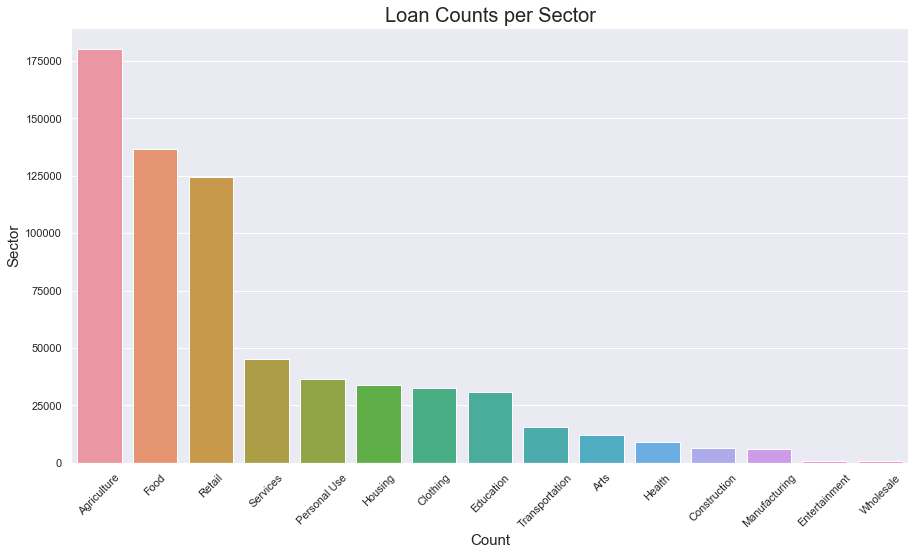

In [14]:
sectors = kiva_loans['sector'].value_counts()
# print(sectors)

# Inistantiate the figure object
fig = plt.figure(figsize=(15,8))

# Plot a barplot of The sectors and their loan counts
bar_plot = sns.barplot(x=sectors.index, y=sectors.values)

# Set labels and title
plt.title("Loan Counts per Sector", fontsize=20)
plt.ylabel("Sector", fontsize=15)
plt.xlabel("Count", fontsize=15)

labels = bar_plot.get_xticklabels()
bar_plot.set_xticklabels(labels, rotation=45)

# show the plot
plt.show()

From the above chart, **Agriculture** was the sector with the highest loan counts, followed by **Food**, then **Retail**. <br>
**Wholesale** had the least loan counts.

### 5.2. Loan counts per world region
<a id="per-region"></a>

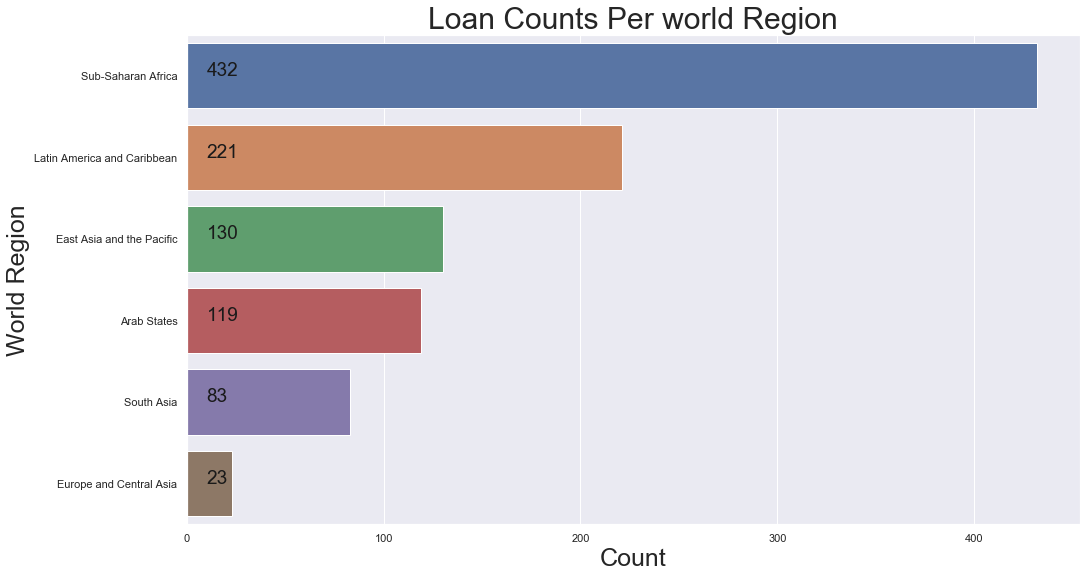

In [54]:
world_regions = mpi_region_locations['world_region'].value_counts()
# print(world_regions)
fig = plt.figure(figsize=(16, 9))

sns.barplot(x=world_regions.values, y=world_regions.index)

plt.title("Loan Counts Per world Region", fontsize=30)

for i, v in enumerate(world_regions.values):
    plt.text(10,i,v,color='k',fontsize=19)

plt.xlabel("Count", fontsize=25)
plt.ylabel("World Region", fontsize=25)
plt.show()

**Sub-Saharan Africa** has the highest number of loans followed by **Latin America and Carribean** region, while **Europe and Central Asia** has the least number of loans.
<br>
<br>
To account for this trend, we take a look at each region's mean poverty index.
<a id="region-mpis"></a>

In [56]:
poverty_index_table = pd.pivot_table(mpi_region_locations, aggfunc=[np.mean], index=['world_region'], values=['MPI'])['mean'].sort_values(by=['MPI'], ascending=False)
poverty_index_table

,MPI
world_region,
Sub-Saharan Africa,0.337128
South Asia,0.219630
East Asia and the Pacific,0.136266
Arab States,0.115287
Latin America and Caribbean,0.063665
Europe and Central Asia,0.025273


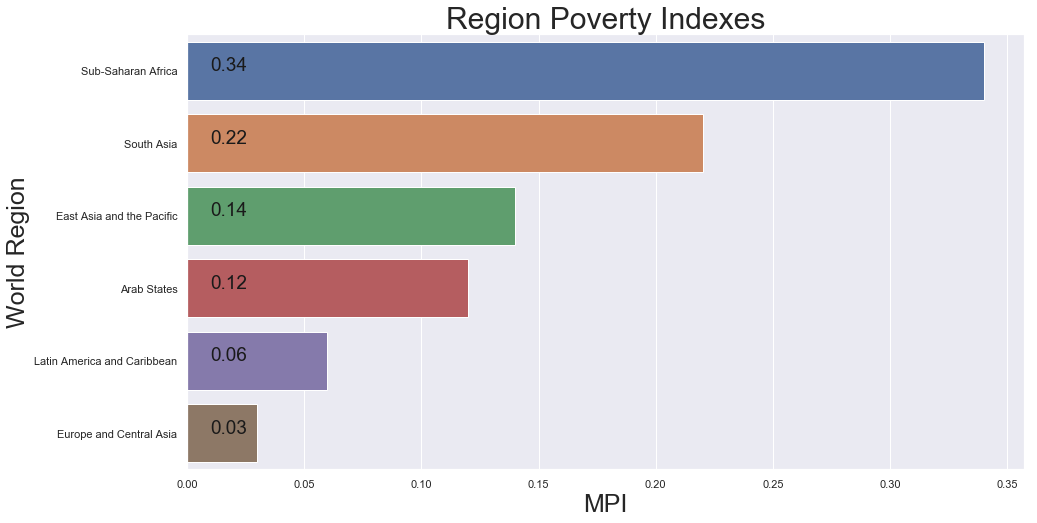

In [60]:
poverty_index = poverty_index_table['MPI'].round(2)
# print(poverty_index['MPI'])
fig = plt.figure(figsize=(15, 8))

sns.barplot(x=poverty_index.values, y=poverty_index.index)

for i, v in enumerate(poverty_index.values):
    plt.text(0.01, i, v, color='k', fontsize=19)

plt.title("Region Poverty Indexes", fontsize=30)
plt.ylabel("World Region", fontsize=25)
plt.xlabel("MPI", fontsize=25)

plt.show()

From the above charts, its clear that **Sub-Saharan Africa** has the highest Multidimensional Poverty Index while **Europe and Central ASia** has the lowest. This explains why the two regions have the highest and lowest loan counts respectively.
<br>
<br>
A [study](https://blogs.worldbank.org/opendata/number-extremely-poor-people-continues-rise-sub-saharan-africa) conducted by The World Bank shows that the number of extremely poor people continues to rise in Sub-Saharan africa while it falls in other regions ([World bank Data Blog](https://blogs.worldbank.org/opendata/number-extremely-poor-people-continues-rise-sub-saharan-africa)).
<br>
<br>
From this study, it is expected that the number of loan counts from **Sub-Saharan Africa** will always be high.

### 5.4. Repayment Intervals
<a id="repayment"></a>

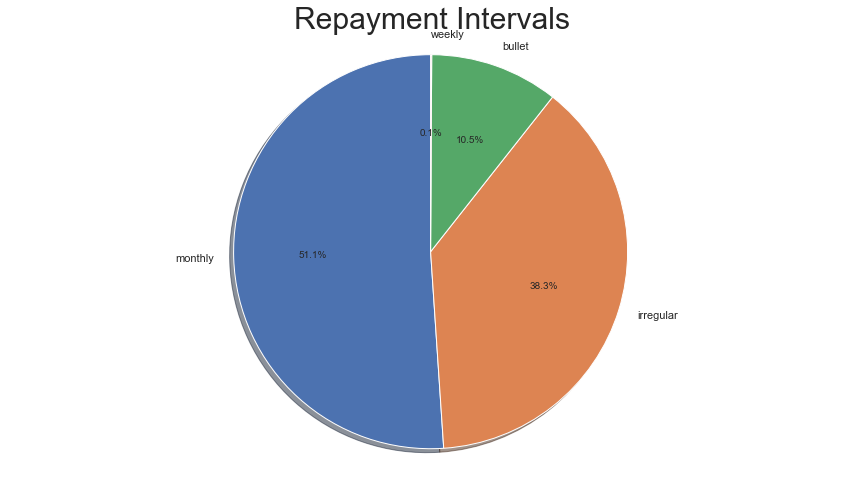

In [73]:
intervals = kiva_loans['repayment_interval'].value_counts()
# print(intervals)
plt.figure(figsize=(15,8))

plt.pie(intervals.values, labels=intervals.index, shadow=True, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Repayment Intervals', fontsize=30)

plt.show()

With a percentage of **51.1%**, majority of the loans are repaid **monthly**.